In [1]:
1+1

2

In [1]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models import Range1d

# **1. Load the data**
data = pd.read_csv("GSPC_20240301.csv")
data['Date'] = pd.to_datetime(data['Date'])

data['Open'] = pd.to_numeric(data['Open'].str.replace(',', ''))  # Remove commas if necessary
data['High'] = pd.to_numeric(data['High'].str.replace(',', ''))  # Remove commas if necessary
data['Low'] = pd.to_numeric(data['Low'].str.replace(',', ''))  # Remove commas if necessary
data['Close'] = pd.to_numeric(data['Close'].str.replace(',', ''))  # Remove commas if necessary

data.dtypes



Date                   datetime64[ns, UTC]
Open                               float64
High                               float64
Low                                float64
Close                              float64
% Change                           float64
% Change vs Average                float64
Volume                              object
dtype: object

In [ ]:
data.head()

,Date,Open,High,Low,Close,% Change,% Change vs Average,Volume
0,1930-03-03 06:00:00+00:00,23.36,24.85,23.36,24.15,3.74,3.11,0
1,1930-04-01 06:00:00+00:00,25.37,25.92,24.73,24.90,3.11,2.48,0
2,1930-05-01 05:00:00+00:00,24.30,24.57,22.98,24.49,-1.65,-2.27,0
3,1930-06-02 05:00:00+00:00,24.40,24.40,19.39,20.46,-16.46,-17.08,0
4,1930-07-01 05:00:00+00:00,20.24,21.82,19.83,21.21,3.67,3.04,0


In [37]:
# **2. Prepare data for Bokeh**
source = ColumnDataSource(data)

# **3. Create the figure (customize as needed)**
p = figure(x_axis_type="datetime", title="Market Data", width=1600, height=1200)

# **4. Choose a line style (or add multiple lines for different columns)**
p.line('Date', 'Close', source=source, line_width=2) 

# **5. Add customizations (optional)**
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Closing Price'
p.y_range = Range1d(start=0, end=round(max(data['Close'])*1.1)) 


hover = HoverTool()
hover.tooltips = [("Date", "@Date{%F}"), ("Close", "@Close{0.2f}")]
p.add_tools(hover)

# **6. Display the chart**
show(p)


In [49]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
import numpy as np
from scipy.optimize import curve_fit
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Ignore overflow warnings


# ... (Load your data as before)

# Define the exponential function 
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Convert 'Date' column to numeric representation for curve fit
data['Date_numeric'] = pd.to_numeric(pd.to_datetime(data['Date']).astype(int), errors='coerce')

# Perform the curve fitting
popt, pcov = curve_fit(exponential_func, data['Date_numeric'], data['Close'])

# Generate fitted data points
x_fit = data['Date_numeric'] 
y_fit = exponential_func(x_fit, *popt)

# **2. Prepare data for Bokeh**
data['Exp_Fit'] = y_fit  # Add the fitted data as a new column
source = ColumnDataSource(data)

# ... (Rest of your Bokeh code)

# **4. Choose a line style (or add multiple lines for different columns)**
p.line('Date', 'Close', source=source, line_width=2) 
p.line('Date', 'Exp_Fit', source=source, line_width=2, color='red', legend_label='Exponential Fit') 


# **5. Add customizations (optional)**
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Closing Price'
p.y_range = Range1d(start=0, end=round(max(data['Close'])*1.1)) 


hover = HoverTool()
hover.tooltips = [("Date", "@Date{%F}"), ("Close", "@Close{0.2f}")]
p.add_tools(hover)

# **6. Display the chart**
show(p)



/tmp/ipykernel_422303/2802824338.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_func, data['Date_numeric'], data['Close'])


In [57]:
import numpy.polynomial.polynomial as poly

# ... (Existing code) 

import numpy.polynomial.polynomial as poly

data['Date'] = pd.to_datetime(data['Date'])
data['Date_numeric'] = data['Date'].astype(np.int64) // 10**6  # Nanosecond precision

# Handle missing values (dropna)
data.dropna(subset=['Close'], inplace=True)  

# Smoothing
window_size = 20  
data['SMA_Close'] = data['Close'].rolling(window=window_size).mean()


# Polynomial fit (Example: 3rd-degree polynomial)
coeff, stats = poly.polyfit(data['Date_numeric'], data['Close'], 3, full=True)
y_fit = poly.polyval(x_fit, coeff)

# **2. Prepare data for Bokeh**
data['Poly_Fit'] = y_fit  # Add the fitted data as a new column
source = ColumnDataSource(data)

# ... (Rest of your Bokeh code)

# **4. Choose a line style (or add multiple lines for different columns)**
p.line('Date', 'Close', source=source, line_width=2) 
p.line('Date', 'Poly_Fit', source=source, line_width=2, color='blue', legend_label='Polynomial Fit') 

# ... (Rest of your code remains the same)


# **5. Add customizations (optional)**
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Closing Price'
p.y_range = Range1d(start=0, end=round(max(data['Close'])*1.1)) 


hover = HoverTool()
hover.tooltips = [("Date", "@Date{%F}"), ("Close", "@Close{0.2f}")]
p.add_tools(hover)

# **6. Display the chart**
show(p)


In [46]:
print(data['Date_numeric'].describe())

count    1.129000e+03
mean     2.261598e+17
std      8.574690e+17
min     -1.257012e+18
25%     -5.154444e+17
50%      2.260440e+17
75%      9.677844e+17
max      1.709273e+18
Name: Date_numeric, dtype: float64


# adding smoothng before exp fit

In [4]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
import numpy as np
from scipy.optimize import curve_fit
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Ignore overflow warnings

# Load data 
data['Date'] = pd.to_datetime(data['Date'])
data['Date_numeric'] = data['Date'].astype(np.int64) // 10**6  # Nanosecond precision


# Handle missing values (dropna)
data.dropna(subset=['Close'], inplace=True)  

# Smoothing
window_size = 20  
data['SMA_Close'] = data['Close'].rolling(window=window_size).mean()


# Define the exponential function 
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Convert 'Date' column to numeric representation for curve fit
data['Date_numeric'] = pd.to_numeric(pd.to_datetime(data['Date']).astype(int), errors='coerce')

# Perform the curve fitting (use the smoothed data)
popt, pcov = curve_fit(exponential_func, data['Date_numeric'], data['SMA_Close'])

# Generate fitted data points
x_fit = data['Date_numeric'] 
y_fit = exponential_func(x_fit, *popt)

# **2. Prepare data for Bokeh**
data['Exp_Fit'] = y_fit  # Add the fitted data as a new column
source = ColumnDataSource(data)

# **4. Choose a line style (or add multiple lines for different columns)**
p.line('Date', 'Close', source=source, line_width=2) 
p.line('Date', 'SMA_Close', source=source, line_width=2, color='blue', legend_label='SMA') # Plot the smoothed data
p.line('Date', 'Exp_Fit', source=source, line_width=2, color='red', legend_label='Exponential Fit') 

# ... (Rest of your Bokeh code) 


# **5. Add customizations (optional)**
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Closing Price'
p.y_range = Range1d(start=0, end=round(max(data['Close'])*1.1)) 


hover = HoverTool()
hover.tooltips = [("Date", "@Date{%F}"), ("Close", "@Close{0.2f}")]
p.add_tools(hover)

# **6. Display the chart**
show(p)


ValueError: array must not contain infs or NaNs

<Axes: xlabel='Date'>

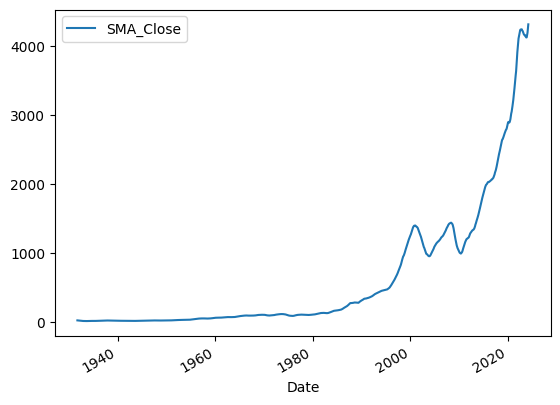

In [5]:
data.plot(x='Date', y='SMA_Close')

In [6]:
print(data['SMA_Close'].describe())

count    1110.000000
mean      605.724023
std       942.609101
min         7.258500
25%        27.322000
50%       101.256250
75%      1020.692500
max      4319.723500
Name: SMA_Close, dtype: float64


In [7]:
data['Close'].describe()

count    1129.000000
mean      634.007449
std      1008.572108
min         4.430000
25%        25.660000
50%       103.460000
75%      1040.940000
max      5248.490000
Name: Close, dtype: float64

count    1110.000000
mean      605.724023
std       942.609101
min         7.258500
25%        27.322000
50%       101.256250
75%      1020.692500
max      4319.723500
Name: SMA_Close, dtype: float64


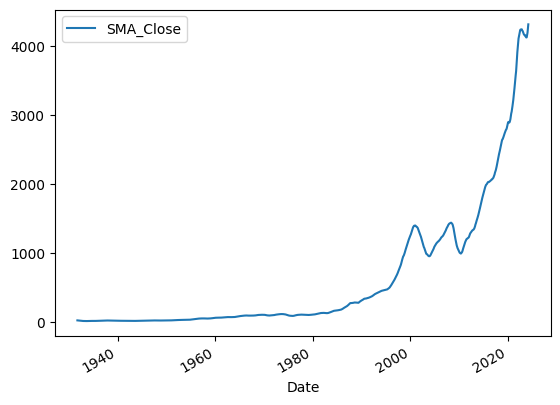

In [8]:
import matplotlib.pyplot as plt # For quick debugging plots

# ... (Your code up to the smoothing calculation)

# Debugging:
print(data['SMA_Close'].describe())
data.plot(x='Date', y='SMA_Close')
plt.show()